In [64]:
# import all necessary modules
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [65]:
# the "peaks" function
def f(x,y):
    # expand to a 2D mesh
    x,y = np.meshgrid(x,y)
    z = (math.e**x)*np.sin(y) \
    + y**2
    return z

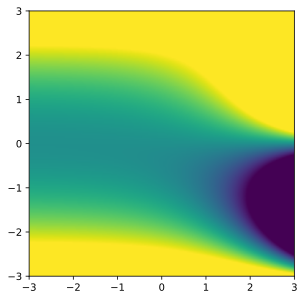

In [ ]:
# create the landscape
x = np.linspace(-3, 13, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)  # your function


plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [67]:
# Define the symbols
sx, sy = sym.symbols('sx sy')

# Define the symbolic expression using sympy functions
sZ = (sym.exp(sx)) * sym.sin(sy) + sy**2

# Create functions from the sympy-computed derivatives
df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

# Evaluate the derivative at a specific point
result_x = df_x(1, 1)
result_y = df_y(1, 1)

print(f"df_x(1, 1) = {result_x}")
print(f"df_y(1, 1) = {result_y}")

df_x(1, 1) = E*sin(1)
df_y(1, 1) = E*cos(1) + 2


In [68]:
df_x(10,10)

exp(10)*sin(10)

In [69]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = np.array([ df_x(localmin[0],localmin[1]), 
                    df_y(localmin[0],localmin[1]) 
                  ])
    localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
    trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[-0.708148519787502 0.0541541592063307]
[-0.3869819   1.80635833]


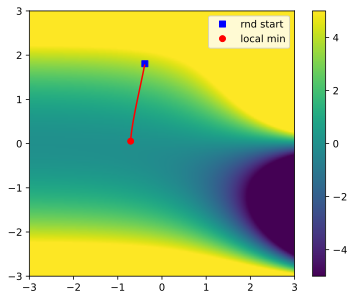

In [70]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

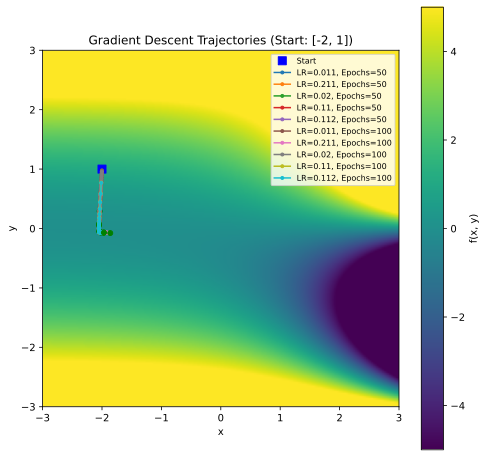

In [74]:
# import all necessary modules
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sym

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# The function f(x, y)
def f(x, y):
    x_mesh, y_mesh = np.meshgrid(x, y)
    z = (np.exp(x_mesh)) * np.sin(y_mesh) + y_mesh**2
    return z

# Define symbolic variables and the function
sx, sy = sym.symbols('sx sy')
sZ = (sym.exp(sx)) * sym.sin(sy) + sy**2

# Create functions for partial derivatives using sympy
df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), modules=['numpy'])
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), modules=['numpy'])

# Landscape setup for plotting
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)
Z = f(x, y)

# Experiment parameters
startpnt = np.array([-2.0, 1.0])
learning_rates = [ 0.011, 0.211, 0.02, 0.11, 0.112]
training_epochs_list = [50, 100]

plt.figure(figsize=(8, 8))
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower', cmap='viridis')
plt.plot(startpnt[0], startpnt[1], 'bs', markersize=8, label='Start')

# Run experiments
for epochs in training_epochs_list:
    for lr in learning_rates:
        localmin = startpnt.copy() # Start from the same point each time
        trajectory = np.zeros((epochs, 2))
        for i in range(epochs):
            grad = np.array([df_x(localmin[0], localmin[1]).item(),
                             df_y(localmin[0], localmin[1]).item()])
            # Add checks for large gradients/values to prevent overflow/invalid results
            if np.linalg.norm(grad) > 1e4 or np.linalg.norm(localmin) > 1e4:
                print(f"Instability detected: LR={lr}, Epochs={epochs}, Iter={i}. Stopping trajectory.")
                trajectory[i:,:] = np.nan # Mark rest of trajectory as invalid
                break
            localmin = localmin - lr * grad
            trajectory[i, :] = localmin
            
        plt.plot(trajectory[:, 0], trajectory[:, 1], 'o-', markersize=3, 
                 label=f'LR={lr}, Epochs={epochs}')
        if not np.isnan(trajectory[-1, 0]): # Plot end point only if valid
             plt.plot(localmin[0], localmin[1], 'go', markersize=5) # Mark end point


plt.legend(fontsize=8, loc='upper right')
plt.title('Gradient Descent Trajectories (Start: [-2, 1])')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='f(x, y)')
plt.show()

Instability detected: Start=[ 2.  -1.5], Iter=15. Stopping trajectory.


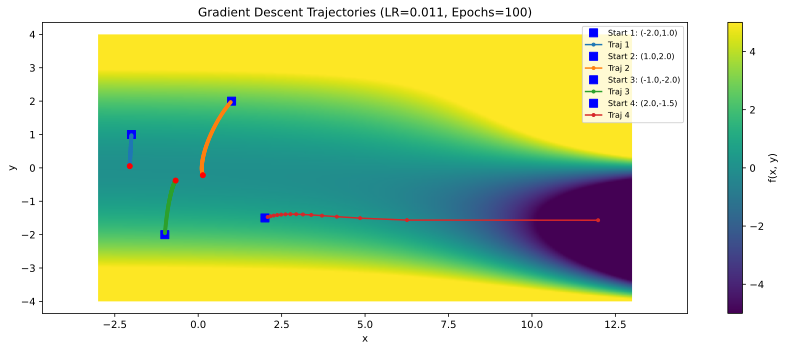

In [93]:

# Experiment parameters
learning_rate = 0.011
training_epochs = 100
startpnts = [np.array([-2.0, 1.0]), np.array([1.0, 2.0]),
             np.array([-1.0, -2.0]), np.array([2.0, -1.5])]

plt.figure(figsize=(12, 5))
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower', cmap='viridis')


# Run experiments from different starting points
for idx, startpnt in enumerate(startpnts):
    localmin = startpnt.copy()
    trajectory = np.zeros((training_epochs, 2))
    plt.plot(startpnt[0], startpnt[1], 'bs', markersize=8, label=f'Start {idx+1}: ({startpnt[0]},{startpnt[1]})') # Label start points

    for i in range(training_epochs):
        grad = np.array([df_x(localmin[0], localmin[1]).item(),
                         df_y(localmin[0], localmin[1]).item()])
        if np.linalg.norm(grad) > 1e4 or np.linalg.norm(localmin) > 1e4: # Stability check
             print(f"Instability detected: Start={startpnt}, Iter={i}. Stopping trajectory.")
             trajectory[i:,:] = np.nan
             break
        localmin = localmin - learning_rate * grad
        trajectory[i, :] = localmin
        
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'o-', markersize=3, label=f'Traj {idx+1}')
    if not np.isnan(trajectory[-1, 0]): # Plot end point only if valid
        plt.plot(localmin[0], localmin[1], 'ro', markersize=5) # Mark end point

plt.legend(fontsize=8, loc='upper right')
plt.title(f'Gradient Descent Trajectories (LR={learning_rate}, Epochs={training_epochs})')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.tight_layout()

plt.colorbar(label='f(x, y)')
plt.show()

Starting Point: [0. 0.]
Final Point (Local Maxima Estimate): [1.12667721 2.57642928]


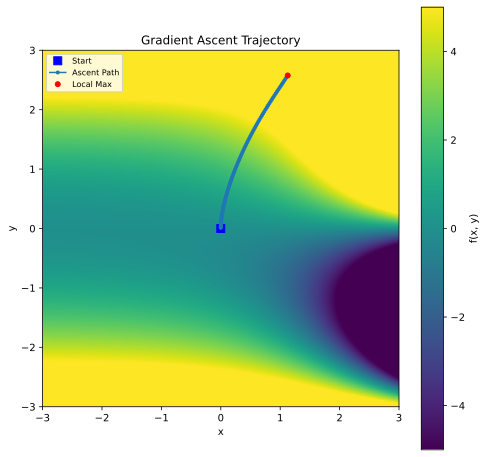

In [77]:
# Gradient Ascent parameters
startpnt_ascent = np.array([0.0, 0.0]) # Start near the center
learning_rate = 0.011
training_epochs = 100

# Run Gradient Ascent
localmax = startpnt_ascent.copy() # Use a different variable name for clarity
trajectory_ascent = np.zeros((training_epochs, 2))

for i in range(training_epochs):
    grad = np.array([df_x(localmax[0], localmax[1]).item(),
                     df_y(localmax[0], localmax[1]).item()])
    if np.linalg.norm(grad) > 1e4 or np.linalg.norm(localmax) > 1e4: # Stability check
        print(f"Ascent Instability: Iter={i}. Stopping trajectory.")
        trajectory_ascent[i:,:] = np.nan
        break
    # --- The key change for Gradient Ascent ---
    localmax = localmax + learning_rate * grad 
    # -----------------------------------------
    trajectory_ascent[i, :] = localmax

print(f"Starting Point: {startpnt_ascent}")
if not np.isnan(localmax).any():
    print(f"Final Point (Local Maxima Estimate): {localmax}")
else:
    print("Gradient ascent became unstable.")


# Plot the results
plt.figure(figsize=(8, 8))
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower', cmap='viridis')
plt.plot(startpnt_ascent[0], startpnt_ascent[1], 'bs', markersize=8, label='Start')
plt.plot(trajectory_ascent[:, 0], trajectory_ascent[:, 1], 'o-', markersize=3, label='Ascent Path')
if not np.isnan(trajectory_ascent[-1, 0]): # Plot end point only if valid
    plt.plot(localmax[0], localmax[1], 'ro', markersize=5, label='Local Max')

plt.legend(fontsize=8, loc='upper left')
plt.title('Gradient Ascent Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='f(x, y)')
plt.show()